----
Uvod u znanost o podacima - projekt, FER

## Malignant and Benign Breast Cancer Classification using Machine Learning Algorithms
2023./2024. Barbara Pašalić, Tin Pavletić, Jan Kolić

Kod dijagnostike tumorskih masa na dojci, najčešće se radi biopsija širokom iglom, čime se čuva izgled i arhitektura tkiva pa lakše odrediti je li bioptirana lezija maligna ili benigna. Druga i jednostavnija opcija je napraviti aspiraciju lezije tankom iglom (FNA - fine-needle aspiration) čime ostaju sačuvane stanice s jezgrama, ali zbog narušavanja arhitekture tkiva je teže postaviti dijagnozu.

Korištena baza (WBCD - Wisconsin Breast Cancer Dataset) sadrži podatke o individualnim slikama aspirata različitih lezija.

Svaki aspirat ima svoj "id" broj i "groud truth" podatak ("diagnosis") tj. labelu koju pokušavamo predvidjeti - dijagnozu je li lezija maligna - "M" ili benigna - "B".

Značajke svakog aspirata opisuju karakteristike jezgara stanica prikazanih na slikama. Za svaku jezgru na jednoj slici je određen njen radius, tekstura, površina itd. a zatim je izračunat njihov prosjek ("mean"), standardna pogreška ("standard_error") i prosjek triju najvećih vrijednosti ("worst"). Te tri vrijednosti su uvrštene u bazu kao značajke svakog aspirata.

---

Vrijednosti određene za jezgru svake stanice su:
- "radius" (polumjer) - prosjek vrijednosti udaljenosti od centra do točaka na rubu jegre
- "texture" (tekstura) - standardna devijacija crno-bijelih vrijednosti
- "perimeter" (opseg)
- "area" (površina)
- "smoothness" (glatkost) - varijacija u duljini polumjera
- "compactness" (zbijenost) - (perimeter^2/area-1.0)
- "concavity" (konkavnost) - jačina konkavnih dijelova ruba
- "concave points" - broj konkavnih dijelova ruba
- "symmetry" (simetrija)
- "fractal dimension" (fraktalna dimenzija)

Sufiks naziva svake značajke označavaju radi li se o prosjeku svih vrijednosti ("_mean"), standardnoj pogrešci ("_se") ili prosjeku triju najvećih vrijednosti ("worst").

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("clean_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                563 non-null    int64  
 1   radius_mean              563 non-null    float64
 2   texture_mean             563 non-null    float64
 3   perimeter_mean           563 non-null    float64
 4   area_mean                563 non-null    float64
 5   smoothness_mean          563 non-null    float64
 6   compactness_mean         563 non-null    float64
 7   concavity_mean           563 non-null    float64
 8   concave points_mean      563 non-null    float64
 9   symmetry_mean            563 non-null    float64
 10  radius_se                563 non-null    float64
 11  perimeter_se             563 non-null    float64
 12  area_se                  563 non-null    float64
 13  smoothness_se            563 non-null    float64
 14  compactness_se           5

In [4]:
y = df['diagnosis']

In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
558    1
559    1
560    1
561    1
562    0
Name: diagnosis, Length: 563, dtype: int64

In [6]:
X = df.drop(['diagnosis'], axis=1)

In [7]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
559,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
560,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
561,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

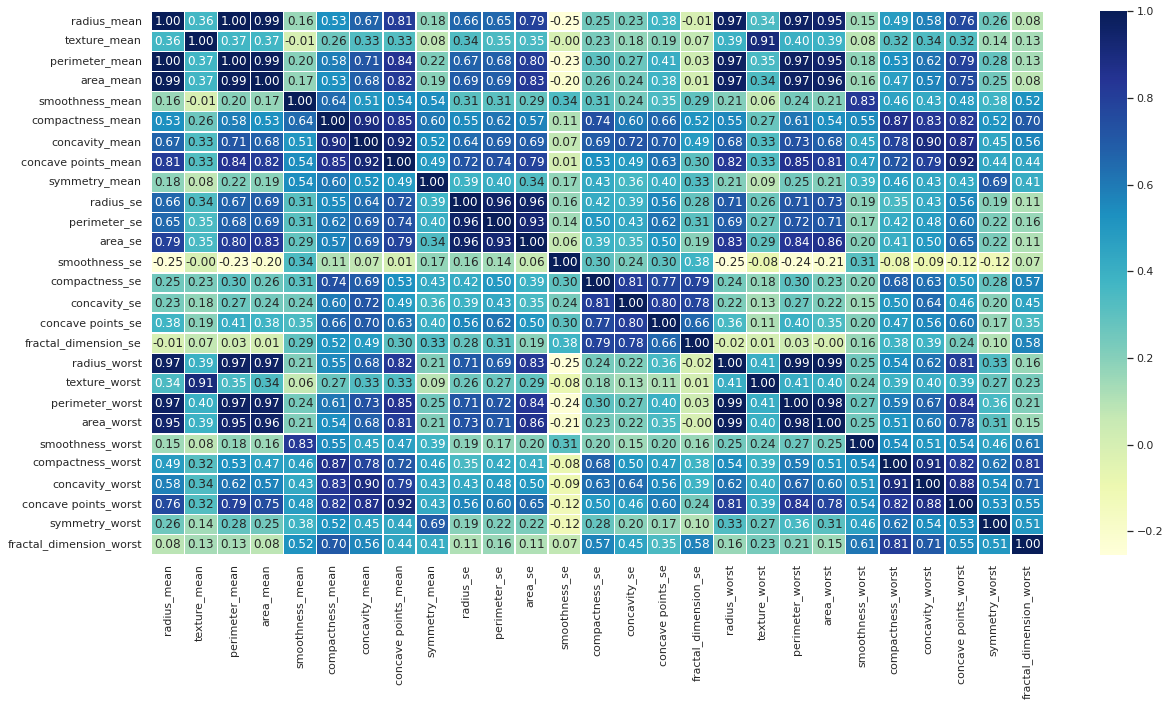

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

In [10]:
corrs = X_train.corr()
highly_correlated = {}
for i in range(len(corrs.columns)): 
    for j in range(i):
        if corrs.iloc[i,j] > 0.95:
            f1 = corrs.columns[i]
            f2 = corrs.columns[j]
            corr = corrs.iloc[i,j]
            highly_correlated[(f1,f2)] = corr

for features, correlation in highly_correlated.items():
    print(f"Features: {features}, Correlation: {correlation}")

Features: ('perimeter_mean', 'radius_mean'), Correlation: 0.9975679412625338
Features: ('area_mean', 'radius_mean'), Correlation: 0.9913832825296925
Features: ('area_mean', 'perimeter_mean'), Correlation: 0.9898929803196795
Features: ('perimeter_se', 'radius_se'), Correlation: 0.9591137208477575
Features: ('area_se', 'radius_se'), Correlation: 0.9565923670403048
Features: ('radius_worst', 'radius_mean'), Correlation: 0.9715805544336993
Features: ('radius_worst', 'perimeter_mean'), Correlation: 0.9712625464002991
Features: ('radius_worst', 'area_mean'), Correlation: 0.9700408506361744
Features: ('perimeter_worst', 'radius_mean'), Correlation: 0.9669721103878086
Features: ('perimeter_worst', 'perimeter_mean'), Correlation: 0.9725856767254979
Features: ('perimeter_worst', 'area_mean'), Correlation: 0.9657239659290761
Features: ('perimeter_worst', 'radius_worst'), Correlation: 0.9931992309755737
Features: ('area_worst', 'area_mean'), Correlation: 0.9644345496896308
Features: ('area_worst',

In [11]:
X_train.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'area_worst', 'perimeter_worst', 'perimeter_se', 'area_se'], axis=1, inplace=True)

/home/jkolic/anaconda3/envs/nnets/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


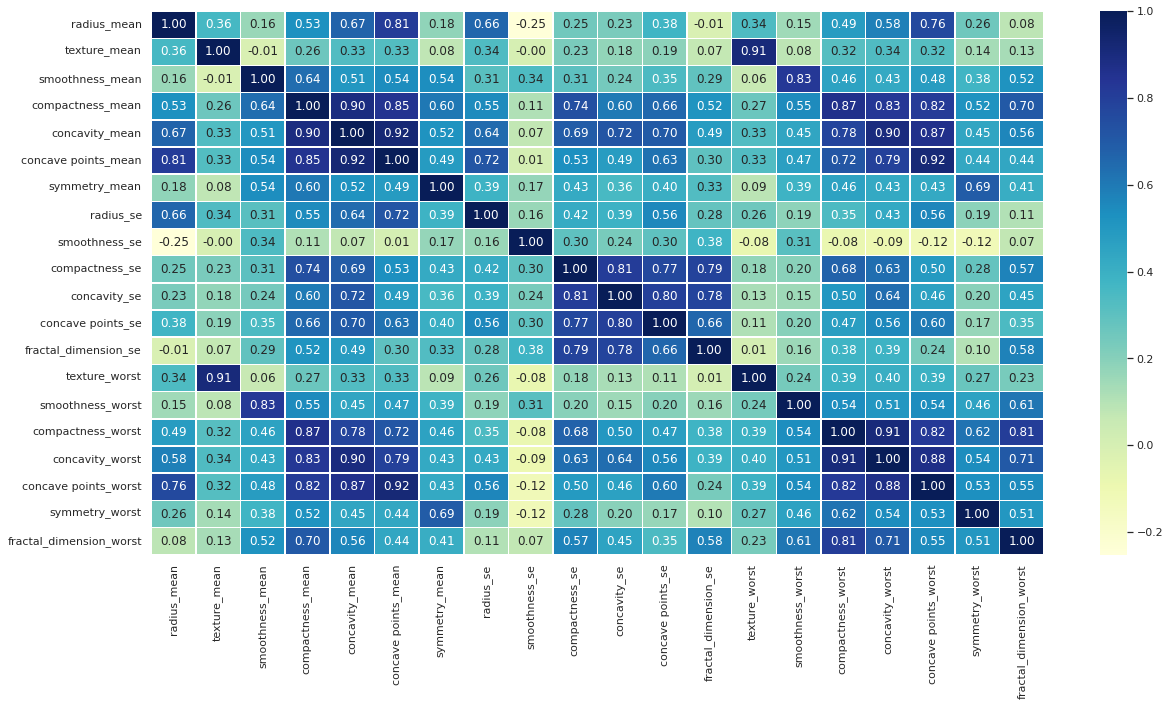

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

In [13]:
X_test.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'area_worst', 'perimeter_worst', 'perimeter_se', 'area_se'], axis=1, inplace=True)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[ 1.89349763,  0.02896263, -1.21346397, ...,  0.34562212,
         0.25121376, -1.36588031],
       [-0.23497335, -1.07474856, -1.69158531, ..., -0.36745677,
        -1.35940782, -1.22676203],
       [ 0.05850233,  1.87373706, -1.06751113, ..., -0.66866532,
        -1.57405291, -0.41651274],
       ...,
       [-0.20099195,  2.52019647, -0.33271412, ..., -0.74535494,
        -1.09462664, -0.47817322],
       [-1.3668627 , -0.60623442, -0.88201443, ..., -0.68531504,
         0.13684083,  0.6174469 ],
       [ 2.38468324,  0.32854139, -0.22055332, ...,  1.04524669,
        -0.09660529,  0.12467264]])

In [15]:
from sklearn.decomposition import PCA

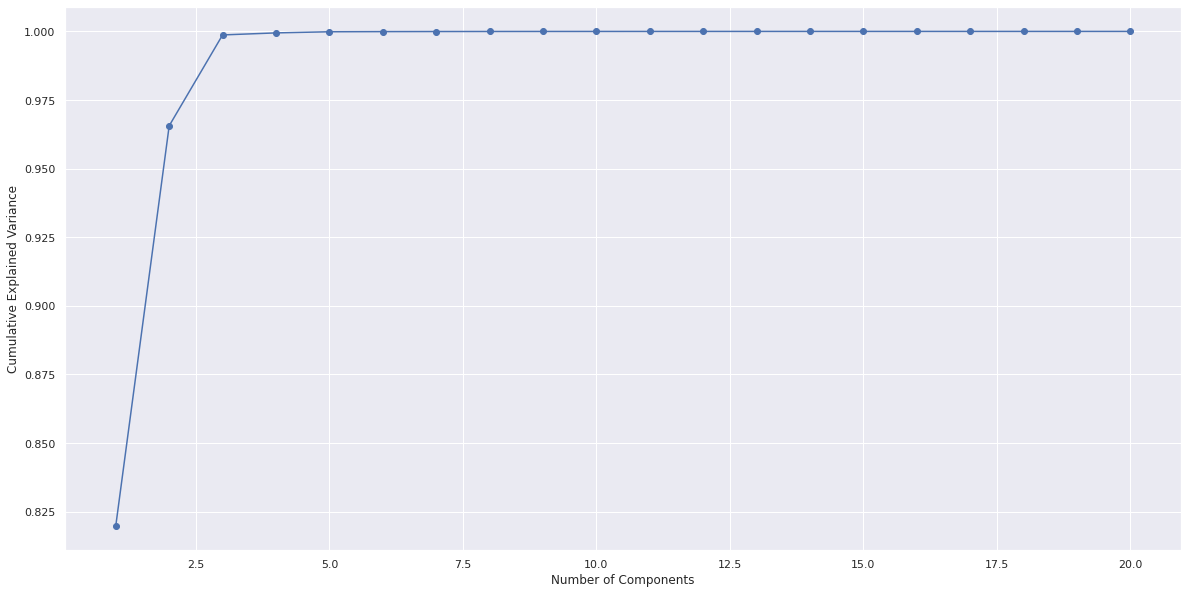

In [16]:
pca = PCA()
X_train_red = pca.fit_transform(X_train)

explained_variance = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [17]:
pca = PCA(n_components=4)
X_train_red = pca.fit_transform(X_train)
X_test_red = pca.transform(X_test)

### Logistic regression

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
logreg = LogisticRegression()

paramsDict = {'penalty': [None,'l1','l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

gridSearch =  GridSearchCV(logreg, paramsDict , scoring='accuracy')

gridSearch.fit(X_train_red, y_train)

print('Best parameters: {0}'.format(gridSearch.best_params_))
print('Best estimator: {0}'.format(gridSearch.best_estimator_))

bestLogReg = gridSearch.best_estimator_


y_pred_train = bestLogReg.predict(X_train_red)
y_pred_test = bestLogReg.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))
print('------------------------------------------')


Best parameters: {'C': 100, 'penalty': 'l2'}
Best estimator: LogisticRegression(C=100)
Training accuracy: 0.9644549763033176
Testing accuracy: 0.9219858156028369
------------------------------------------


/home/jkolic/anaconda3/envs/nnets/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jkolic/anaconda3/envs/nnets/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jkolic/anaconda3/envs/nnets/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/jkolic/anaconda3/envs/nnets/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 440, in _check_solver
    " got %s." % (all_penalties, penalty))
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
/home/jkolic/anaconda3/envs/nnets/lib/python3.6/s

### SVM

In [21]:
from sklearn.svm import SVC
svc = SVC()

paramsDict = {'C': [ 0.01, 0.1, 1, 10, 100],
              'kernel': ['linear','poly','rbf', 'sigmoid'],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]}

gridSearch = GridSearchCV(svc, paramsDict, scoring='accuracy')


gridSearch.fit(X_train_red, y_train)

print('Best parameters: {0}'.format(gridSearch.best_params_))
print('Best estimator: {0}'.format(gridSearch.best_estimator_))

bestSvc = gridSearch.best_estimator_

y_pred_train = bestSvc.predict(X_train_red)
y_pred_test = bestSvc.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))
print('------------------------------------------')

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best estimator: SVC(C=10, kernel='linear')
Training accuracy: 0.966824644549763
Testing accuracy: 0.9219858156028369
------------------------------------------


### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
randfor = RandomForestClassifier()

paramsDict =  {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


gridSearch = GridSearchCV(randfor, paramsDict, scoring='accuracy')

gridSearch.fit(X_train_red, y_train)

print('Best parameters: {0}'.format(gridSearch.best_params_))
print('Best estimator: {0}'.format(gridSearch.best_estimator_))

bestRandFor = gridSearch.best_estimator_

y_pred_train = bestRandFor.predict(X_train_red)
y_pred_test = bestRandFor.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))
print('------------------------------------------')

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best estimator: RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)
Training accuracy: 0.9834123222748815
Testing accuracy: 0.8936170212765957
------------------------------------------


### Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gnb = GaussianNB()

paramsDict = {'var_smoothing': [1e-9,1e-8,1e-7, 1e-6]}

gridSearch = GridSearchCV(gnb, paramsDict, scoring='accuracy')

gridSearch.fit(X_train_red, y_train)

print('Best parameters: {0}'.format(gridSearch.best_params_))
print('Best estimator: {0}'.format(gridSearch.best_estimator_))

bestGnb = gridSearch.best_estimator_

y_pred_train = bestGnb.predict(X_train_red)
y_pred_test = bestGnb.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))
print('------------------------------------------')

Best parameters: {'var_smoothing': 1e-09}
Best estimator: GaussianNB()
Training accuracy: 0.9028436018957346
Testing accuracy: 0.8085106382978723
------------------------------------------


### Decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dectree = DecisionTreeClassifier()

paramsDict = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,2,4]
              }

gridSearch = GridSearchCV(dectree, paramsDict, scoring='accuracy')

gridSearch.fit(X_train_red, y_train)

print('Best parameters: {0}'.format(gridSearch.best_params_))
print('Best estimator: {0}'.format(gridSearch.best_estimator_))

bestDecTree = gridSearch.best_estimator_

y_pred_train = bestDecTree .predict(X_train_red)
y_pred_test = bestDecTree .predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))
print('------------------------------------------')

Best parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=5,
                       splitter='random')
Training accuracy: 0.9620853080568721
Testing accuracy: 0.7943262411347518
------------------------------------------


### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
neigh = KNeighborsClassifier()


paramsDict = {'n_neighbors':[3,5,6,9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]
              }

gridSearch = GridSearchCV(neigh, paramsDict, scoring='accuracy')


gridSearch.fit(X_train_red, y_train)

print('Best parameters: {0}'.format(gridSearch.best_params_))
print('Best estimator: {0}'.format(gridSearch.best_estimator_))

bestNeigh = gridSearch.best_estimator_

y_pred_train = bestNeigh.predict(X_train_red)
y_pred_test = bestNeigh.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))
print('------------------------------------------')

Best parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best estimator: KNeighborsClassifier(n_neighbors=9)
Training accuracy: 0.9312796208530806
Testing accuracy: 0.8439716312056738
------------------------------------------


In [30]:
models = [LogisticRegression(max_iter=5000),
          SVC(C=10000,probability=True),
          RandomForestClassifier(),
          GaussianNB(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
]
accs_train = [[] for i in range(len(models))]
accs_test = [[] for i in range(len(models))]

In [31]:
iter = 10

In [33]:
import warnings
warnings.filterwarnings("ignore")
for i in range(iter):
    if (i%1)==0:
        print("Iterations finished: " + str(i))

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
    X_train.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'area_worst', 'perimeter_worst', 'perimeter_se', 'area_se'], axis=1, inplace=True)
    X_test.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'area_worst', 'perimeter_worst', 'perimeter_se', 'area_se'], axis=1, inplace=True)

    scaler = StandardScaler()
    scaler.fit_transform(X_train)
    scaler.fit_transform(X_test)

    pca = PCA(n_components=4)
    X_train_red = pca.fit_transform(X_train)
    X_test_red = pca.transform(X_test)

    for i in range(len(models)):
        clf = models[i]
        clf.fit(X_train_red, y_train)

        y_train_pred = [clf.predict([x]) for x in X_train_red]
        y_test_pred = [clf.predict([x]) for x in X_test_red]
        accs_train[i].append(accuracy_score(y_train, y_train_pred))
        accs_test[i].append(accuracy_score(y_test, y_test_pred))

print("Iterations finished: " + str(iter))
print("Done")

Iterations finished: 0
Iterations finished: 1
Iterations finished: 2
Iterations finished: 3
Iterations finished: 4
Iterations finished: 5
Iterations finished: 6
Iterations finished: 7
Iterations finished: 8
Iterations finished: 9
Iterations finished: 10
Done


In [34]:
accs_train_mean, accs_test_mean = [], []

for i in range(len(accs_train)):
    accs_train_mean.append(np.mean(accs_train[i]))
    accs_test_mean.append(np.mean(accs_test[i]))

In [35]:
models_name = ["LogisticRegression",
               "SVC",
               "RandomForestClassifier",
               "GaussianNB",
               "DecisionTreeClassifier",
               "KNeighborsClassifier"]

In [36]:
accs_train_paper = [0.991, 0.988, 0.995, 0.951, 1.0, 0.976]
accs_test_paper = [0.944, 0.965, 0.965, 0.923, 0.951, 0.958]
results = pd.DataFrame({"Model":models_name,
                        "Train Accuracy": accs_train_mean,
                        "Test Acccuracy": accs_test_mean,
                        "Train Accuracy (paper)": accs_train_paper,
                        "Test Accuracy (paper)": accs_test_paper
                       })
results


,Model,Train Accuracy,Test Acccuracy,Train Accuracy (paper),Test Accuracy (paper)
0,LogisticRegression,0.949763,0.946099,0.991,0.944
1,SVC,0.988389,0.915248,0.988,0.965
2,RandomForestClassifier,0.999882,0.920567,0.995,0.965
3,GaussianNB,0.908649,0.896454,0.951,0.923
4,DecisionTreeClassifier,1.000000,0.894681,1.000,0.951
5,KNeighborsClassifier,0.927370,0.892199,0.976,0.958


In [ ]:
X = X.to_numpy()
y = y.to_numpy()

---
U sljedećem dijelu, bit će testirane različite tehnike "ensemble" modela izgrađenih od prethodno treniranih modela korištenih u radu. Zbog sličnosti decision tree i random forest modela, izbacit će se ovaj prvi. 

"Max voting" i "averaging" ensemble tehnike:

In [45]:
#https://stackoverflow.com/questions/1518522/find-the-most-common-element-in-a-list
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def most_common(arr):
    s = np.sum(arr, axis=0)
    s = s/len(arr)
    s = s.round(0)
    return(s.astype(int))

class EnsembleModel():
    def __init__(self, typ="MaxVotingModel"):
        self.clfs = [LogisticRegression(max_iter=5000), 
                     SVC(C=10000, probability=True), 
                     RandomForestClassifier(), 
                     GaussianNB(), 
                     KNeighborsClassifier()]
        self.typ=typ
    
    def fit(self, X, y):
        for clf in self.clfs:
            clf.fit(X, y)
    
    def predict_max(self, X):
        preds = np.array([clf.predict(X) for clf in self.clfs])
        return most_common(preds)
    
    def predict_avg(self, X):
        preds = np.array([clf.predict_proba(X)[::,1] for clf in self.clfs])
        return most_common(preds)
    
    def predict(self, X):
        if self.typ =="MaxVotingModel":
            return self.predict_max(X)
        if self.typ =="AveragingModel":
            return self.predict_avg(X)
   
    def metrics(self, X, y):
        models = []
        accs = []
        precs = []
        recs = []
        for clf in self.clfs:
            models.append(type(clf).__name__)
            accs.append(accuracy_score(y, clf.predict(X)))
            precs.append(precision_score(y, clf.predict(X)))
            recs.append(recall_score(y, clf.predict(X)))
        models.append("MaxVotingModel")
        accs.append(accuracy_score(y, self.predict_max(X)))
        precs.append(precision_score(y, self.predict_max(X)))
        recs.append(recall_score(y, self.predict_max(X)))
        models.append("AveragingModel")
        accs.append(accuracy_score(y, self.predict_avg(X)))
        precs.append(precision_score(y, self.predict_avg(X)))
        recs.append(recall_score(y, self.predict_avg(X)))
        results = pd.DataFrame({"Model":models,
                        "Accuracy": accs, 
                        "Precision":precs, 
                        "Recall":recs, 
                        })
        return results

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = EnsembleModel()
clf.fit(X_train, y_train)

In [47]:
metrics = clf.metrics(X_test, y_test)
metrics

,Model,Accuracy,Precision,Recall
0,LogisticRegression,0.943262,1.000000,0.870968
1,SVC,0.936170,0.981818,0.870968
2,RandomForestClassifier,0.943262,0.950000,0.919355
3,GaussianNB,0.907801,0.945455,0.838710
4,KNeighborsClassifier,0.921986,0.947368,0.870968
5,MaxVotingModel,0.943262,0.982143,0.887097
6,AveragingModel,0.943262,1.000000,0.870968


"Stacking" modela s konačnom predikcijom dobivenom logističkom regresijom:

In [48]:
from sklearn.ensemble import StackingClassifier
estimators = [("lr", LogisticRegression(max_iter=5000)), 
              ("svc", SVC(C=10000, probability=True)), 
              ("rf", RandomForestClassifier()), 
              ("gnb", GaussianNB()), 
              ("knn", KNeighborsClassifier())
             ]
final_estimator = LogisticRegression(max_iter=5000)
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train, y_train)
print("Accuracy: " + str(accuracy_score(y_test, clf.predict(X_test))))
print("Precision: " + str(precision_score(y_test, clf.predict(X_test))))
print("Recall: " + str(recall_score(y_test, clf.predict(X_test))))

Accuracy: 0.9361702127659575
Precision: 0.9818181818181818
Recall: 0.8709677419354839


"AdaBoost" s DecisionTree (max_depth=1) klasifikatorima:

In [49]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
print("Accuracy: " + str(accuracy_score(y_test, clf.predict(X_test))))
print("Precision: " + str(precision_score(y_test, clf.predict(X_test))))
print("Recall: " + str(recall_score(y_test, clf.predict(X_test))))

Accuracy: 0.9432624113475178
Precision: 1.0
Recall: 0.8709677419354839


Gradient boosting:

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
print("Accuracy: " + str(accuracy_score(y_test, clf.predict(X_test))))
print("Precision: " + str(precision_score(y_test, clf.predict(X_test))))
print("Recall: " + str(recall_score(y_test, clf.predict(X_test))))

Accuracy: 0.9432624113475178
Precision: 0.95
Recall: 0.9193548387096774


XGBoost:

In [53]:
#https://neptune.ai/blog/ensemble-learning-guide
import xgboost as xgb
params = {"objective":"binary:logistic",'learning_rate': 0.1,
                'max_depth': 10}
clf = xgb.XGBClassifier(**params)
clf.fit(X_train, y_train)
clf.fit(X_train, y_train)
print("Accuracy: " + str(accuracy_score(y_test, clf.predict(X_test))))
print("Precision: " + str(precision_score(y_test, clf.predict(X_test))))
print("Recall: " + str(recall_score(y_test, clf.predict(X_test))))

[21:05:19] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:05:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9361702127659575
Precision: 0.9491525423728814
Recall: 0.9032258064516129


LightGBM:

In [54]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
print("Accuracy: " + str(accuracy_score(y_test, clf.predict(X_test))))
print("Precision: " + str(precision_score(y_test, clf.predict(X_test))))
print("Recall: " + str(recall_score(y_test, clf.predict(X_test))))

Accuracy: 0.9432624113475178
Precision: 0.95
Recall: 0.9193548387096774


In [55]:
estimators = [("lr", LogisticRegression(max_iter=5000)), 
              ("svc", SVC(C=10000, probability=True)), 
              ("rf", RandomForestClassifier()), 
              ("gnb", GaussianNB()), 
              ("knn", KNeighborsClassifier())
             ]
final_estimator = LogisticRegression(max_iter=5000)
params = {"objective":"binary:logistic",'learning_rate': 0.1,
                'max_depth': 10}

models = [LogisticRegression(max_iter=5000),
          SVC(C=10000,probability=True),
          RandomForestClassifier(),
          GaussianNB(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          EnsembleModel(typ="MaxVotingModel"),
          EnsembleModel(typ="AveragingModel"),
          StackingClassifier(estimators=estimators, final_estimator=final_estimator), 
          AdaBoostClassifier(n_estimators=100),
          GradientBoostingClassifier(),
          xgb.XGBClassifier(**params),
          lgb.LGBMClassifier()         
]
accs_train = [[] for i in range(len(models))]
accs_test = [[] for i in range(len(models))]
precs_train = [[] for i in range(len(models))]
precs_test = [[] for i in range(len(models))]
recs_train = [[] for i in range(len(models))]
recs_test = [[] for i in range(len(models))]
cfs_train = [[] for i in range(len(models))]
cfs_test = [[] for i in range(len(models))]
aucs_train = [[] for i in range(len(models))]
aucs_test = [[] for i in range(len(models))]

In [58]:
iter = 30

In [59]:
import warnings
warnings.filterwarnings("ignore")

for i in range(iter):
    if (i%1)==0:
        print("Iterations finished: " + str(i))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    for i in range(len(models)):
        clf = models[i]
        clf.fit(X_train, y_train)
        if i==11:
            y_train_pred = [clf.predict(x.reshape(1,-1)) for x in X_train]
            y_test_pred = [clf.predict(x.reshape(1,-1)) for x in X_test]
        else:
            y_train_pred = [clf.predict([x]) for x in X_train]
            y_test_pred = [clf.predict([x]) for x in X_test]
        accs_train[i].append(accuracy_score(y_train, y_train_pred))
        accs_test[i].append(accuracy_score(y_test, y_test_pred))
        precs_train[i].append(precision_score(y_train, y_train_pred))
        precs_test[i].append(precision_score(y_test, y_test_pred))
        recs_train[i].append(recall_score(y_train, y_train_pred))
        recs_test[i].append(recall_score(y_test, y_test_pred))
        cfs_train[i].append(confusion_matrix(y_train, y_train_pred))
        cfs_test[i].append(confusion_matrix(y_test, y_test_pred))  
               
print("Iterations finished: " + str(iter))
print("Done")

Iterations finished: 0
[21:06:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iterations finished: 1
[21:06:40] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iterations finished: 2
[21:07:07] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iterations finished: 3
[2

Iterations finished: 26
[21:18:36] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iterations finished: 27
[21:19:05] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iterations finished: 28
[21:19:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Iterations finished: 2

In [60]:
accs_train_mean, accs_test_mean, cfs_train_mean, cfs_test_mean = [], [], [], []
precs_train_mean, precs_test_mean, recs_train_mean, recs_test_mean = [], [], [], []

for i in range(len(accs_train)):
    accs_train_mean.append(np.mean(accs_train[i]))
    accs_test_mean.append(np.mean(accs_test[i]))
    precs_train_mean.append(np.mean(precs_train[i]))
    precs_test_mean.append(np.mean(precs_test[i]))
    recs_train_mean.append(np.mean(recs_train[i]))
    recs_test_mean.append(np.mean(recs_test[i]))
    cfs_train_mean.append(np.mean(cfs_train[i], axis=0))
    cfs_test_mean.append(np.mean(cfs_test[i], axis=0))

In [61]:
models_name = ["LogisticRegression",
               "SVC",
               "RandomForestClassifier",
               "GaussianNB",
               "DecisionTreeClassifier",
               "KNeighborsClassifier",
               "MaxVotingModel",
               "AveragingModel",
               "StackingClassifier",
               "AdaBoostClassifier",
               "GradientBoostingClassifier",
               "XGBClassifier",
               "LGBMClassifier"]

In [62]:
results = pd.DataFrame({"Model":models_name,
                        "Train Accuracy": accs_train_mean, 
                        "Test Acccuracy": accs_test_mean, 
                        "Train Precision":precs_train_mean, 
                        "Test Precision":precs_test_mean, 
                        "Train Recall":recs_train_mean, 
                        "Test Recall":recs_test_mean
                       })
results

,Model,Train Accuracy,Test Acccuracy,Train Precision,Test Precision,Train Recall,Test Recall
0,LogisticRegression,0.958187,0.952414,0.952334,0.949903,0.932612,0.918656
1,SVC,0.968201,0.956303,0.962961,0.950197,0.949634,0.928989
2,RandomForestClassifier,0.999924,0.960650,1.000000,0.957457,0.999781,0.934498
3,GaussianNB,0.940911,0.941890,0.940259,0.941771,0.895712,0.896153
4,DecisionTreeClassifier,1.000000,0.932052,1.000000,0.906514,1.000000,0.908877
5,KNeighborsClassifier,0.943816,0.932281,0.951024,0.919724,0.892646,0.891181
6,MaxVotingModel,0.974545,0.961336,0.980440,0.964981,0.949447,0.927898
7,AveragingModel,0.973781,0.961107,0.982479,0.969510,0.945278,0.922095
8,StackingClassifier,0.984755,0.961702,0.989066,0.963269,0.969227,0.930212
9,AdaBoostClassifier,1.000000,0.966667,1.000000,0.968676,1.000000,0.938600


LogisticRegression


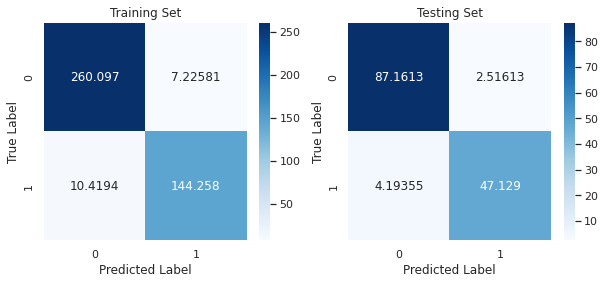

SVC


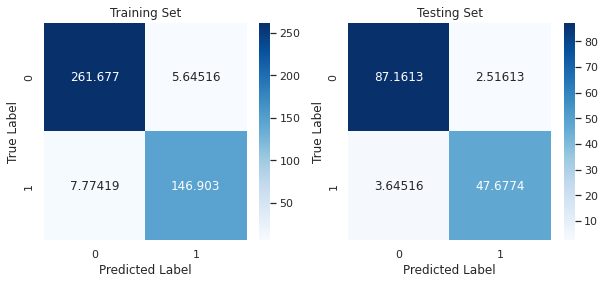

RandomForestClassifier


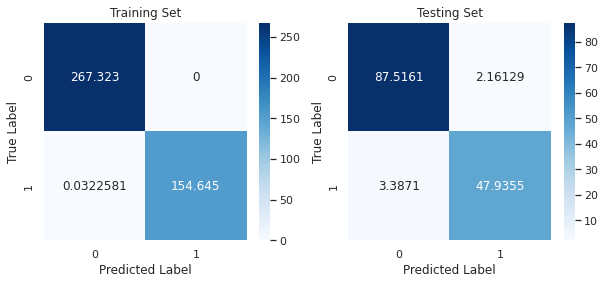

GaussianNB


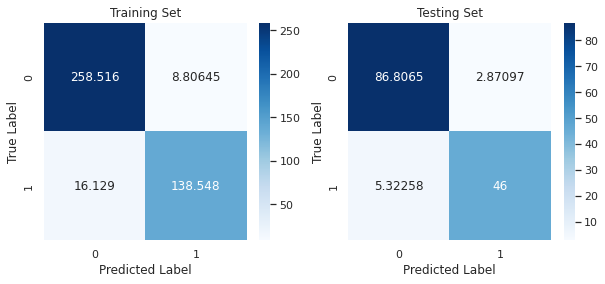

DecisionTreeClassifier


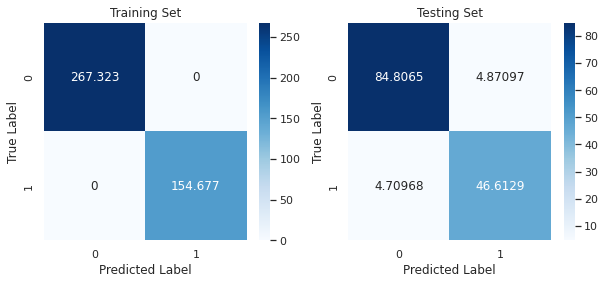

KNeighborsClassifier


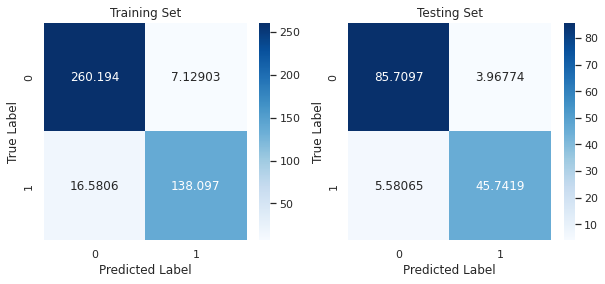

MaxVotingModel


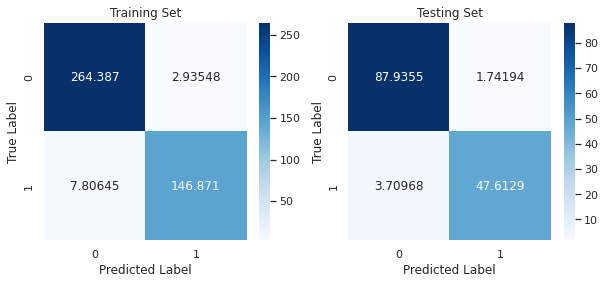

AveragingModel


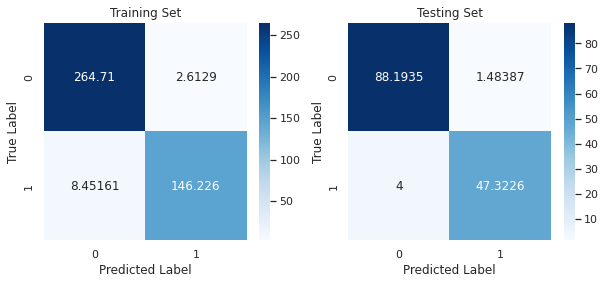

StackingClassifier


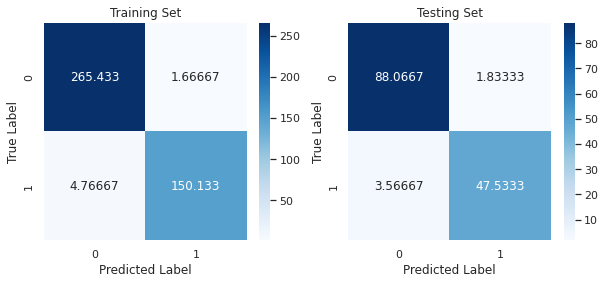

AdaBoostClassifier


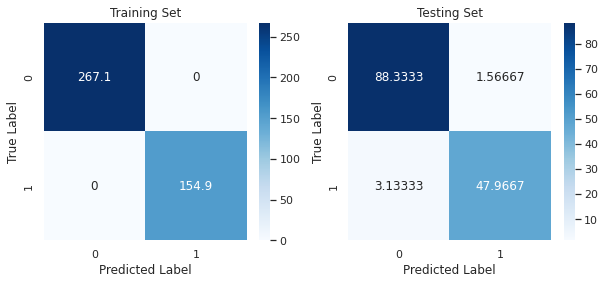

GradientBoostingClassifier


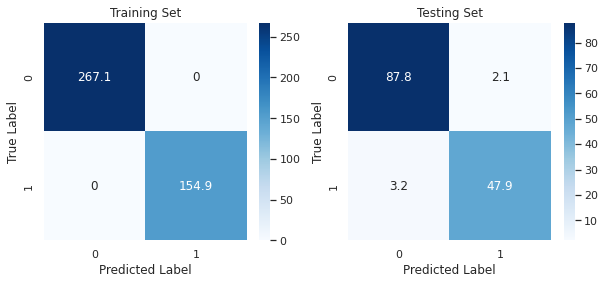

XGBClassifier


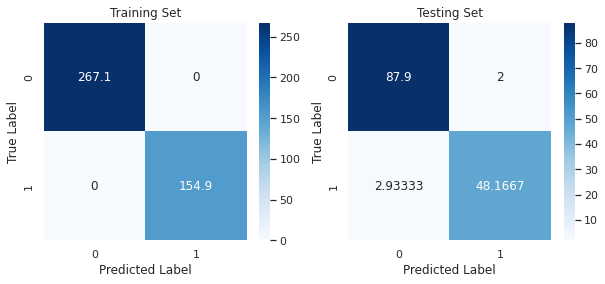

LGBMClassifier


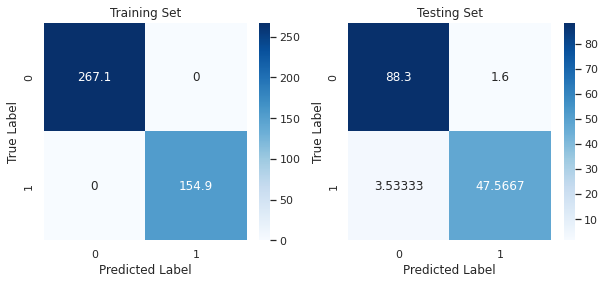

In [64]:
def print_cf(cf_train, cf_test, title=None):
    plt.figure(figsize=(10, 4))    
    plt.subplot(1,2,1)
    sns.heatmap(cf_train, annot=True, cmap="Blues", fmt="g")
    plt.title("Training Set")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.subplot(1,2,2)
    sns.heatmap(cf_test, annot=True, cmap="Blues", fmt="g")
    plt.title("Testing Set")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
for i in range(len(cfs_train_mean)):
    print(models_name[i])
    print_cf(cfs_train_mean[i], cfs_test_mean[i])